# Лабораторна робота № 6

**Тема.** Фрактальний аналіз складних систем
 
**Мета.** Навчитися використовувати методи монофрактального аналізу для дослідження нелінійних характеристик складних систем

## Теоретичні відомості

### Визначення фрактала

**Фракталами** називають геометричні об'єкти: лінії, поверхні, просторові тіла, що мають сильно шорстку поверхню або форму і характеризуються властивістю *самоподібності* [@mandelbrot1982fractal;@PhysRevA.42.4528;@10.1007/3-7643-7412-8_8]. Слово фрактал походить від латинського слова *fractus* і перекладається як дробовий, ламаний. Самоподібність як основна характеристика фрактала означає, що він більш-менш однорідно змінюється в широкому діапазоні масштабів. Так, при збільшенні маленькі фрагменти фрактала стають дуже схожими на великі. В ідеальному випадку така самопподібність призводить до того, що  фрактальний об'єкт виявляється інваріантним щодо розтягувань, тобто йому, як кажуть, притаманна дилатаційна симетрія. Вона передбачає незмінність основних геометричних особливостей фрактала при зміні масштабу.

Очевидно, що фрактальні об'єкти реального світу не є нескінченно самоподібними й існує мінімальний масштаб $l_{min}$, такий, що на масштабі $l \approx l_{min}$ властивість самоподібності зникає. Окрім цього, на достатньо великих масштабах довжин $l > l_{max}$, де $l_{max}$ --- характерний геометричний розмір об'єктів, ця властивість самоподібності також порушується. Тому властивості природніх фракталів розглядаються лише на масштабах $l$, що задовільняють відношення $l_{min} \ll l \ll l_{max}$. Такі обмеження природні, оскільки, коли ми приводимо в якості прикладу фракталу --- ламану, негладку траєкторію броунівської частинки, то ми розуміємо, що цей образ представляє очевидну ідеалізацію. Справа в тому, що на малих масштабах приховується граничність маси і розмірів броунівської частинки, а також скінченність часу зіткнення. При врахуванні цих обставин траєкторія броунівської частинки починає представляти гладку криву. 

Варто зазначити, що властивість точної самоподібності характерна лише для **регулярних фракталів**. Якщо замість детермінованого способу побудови включити в алгоритм їхнього створення деякий елемент випадковості (як це буває, наприклад, у багатьох процесах диференційованого зростання кластерів, електричному пробої тощо), то виникають так звані **випадкові фрактали**. Основна їхня відмінність від регулярних полягає в тому, що властивості самоподібності є справедливими тільки після відповідного усереднення за всіма статистично незалежними реалізаціями об'єкта. При цьому збільшена частина фрактала не точно ідентична вихідному фрагменту, проте їхні статистичні характеристики збігаються.

### Довжина берегової лінії

Першочергово поняття фрактала у фізиці виникло у зв'язку із завданням про визначення довжини берегової лінії. Під час її вимірювання за наявною картою місцевості з'ясувалася цікава деталь --- чим більш великомасштабна карта береться, тим довшою виявляється ця берегова лінія [@steinhaus1954length;@vulpiani2014lewis;@0c446163-c0a0-36ed-a942-0e71e56cd938;@science.156.3775.636]. Нехай, наприклад, відстань по прямій між розсташованими на береговій лінії точками А та В дорівнює R (див. [@fig-costline]). 

::: {#fig-costline}

![](Images\lab_6\costline.jpg)

Визначення довжини берегової лінії між точками А та В [@Bozhokin]

:::

Тоді, щоб виміряти довжину берегової лінії між цима точками, ми розташуємо по берегу  жорстко пов'язані один з одним вузол так, що відстань між сусідніми вузлами дорівнювала б, наприклад, $l=10$ км. Довжину берегової лінії в кілометрах між точками А і В ми приймемо тоді рівною числу вузлів мінус 1, помноженому на 10. Наступне вимірювання цієї довжини ми зробимо так само, але відстань між сусідніми вузлами зробимо вже рівною $l=1$ км.

Виявляється, що результат цих вимірювань буде різним. При зменшенні масштабу $l$ ми отримуватимемо все більші й більші значення довжини. На відміну від гладкої кривої, лінія морського узбережжя виявляється найчастіше настільки порізаною (аж до найменших масштабів), що зі зменшенням довжини ланки $l$ величина $L$ --- довжина берегової лінії --- не прагне до кінцевого межі, а збільшується за степеневим законом 

$$ 
L \approx l\left( R \big/ l \right)^{D}, 
$$ {#eq-6-1}

а $D > 1$ --- деякий степеневий показник, котрий іменується **фрактальною розмірністю** берегової лінії [@science.156.3775.636]. Чим більше значення $D$, тим більш ломаною або деталізованою представляється ця берегова лінія. Походження залежності ([-@eq-6-1]) має бути інтуїтивно зрозумілим: чим менший масштаб ми використовуємо, тим меньші деталі узбережжя будуть враховані і тим менший вклад вони внесуть у вимірювану довжину. Навпаки, збільшуючи масштаб, ми "розгортаємо" узбережжя, зменшуючи довжину $L$. 

Таким чином, ми бачимо, що для визначення довжини берегової лінії $L$ за допомогою жорсткого масштабу $l$, необхідно зробити $N=L/l$ кроків, причому величина $L$ змінюється з $l$ так, що $N$ залежить від $l$ за законом $N \approx (R/l)^{D}$. У результаті зі зменшенням масштабу довжина берегової лінії необмежено зростає. Ця обставина різко відрізняє фрактальну криву від звичайної гладкої кривої (типу кола, еліпса), для якої межа довжини апроксимованої ламаної $L$, яка апроксимує, за наближення до нуля довжини її ланки $l$ є скінченною. У результаті для гладкої кривої її фрактальна розмірність $D = 1$, тобто збігається з топологічною.


### Фрактальна розмірність множин

Вище було введено поняття про фрактальну розмірність берегової лінії. Дамо тепер загальне визначення цієї величини. Нехай $d$ --- звичайна Евклідова розмірність простору, в якому розташований наш фрактальний об'єкт ($d=1$ --- лінія, $d=2$ --- площина, $d=3$ --- звичайний тривимірний простір). Покриємо тепер цей об'єкт цілком $d$-мірними "кулями" радіуса 1. Припустимо, що нам потребувалося для цього не менше, ніж $N(l)$ куль. Тоді, якщо за досить малих $l$ величина $N(l)$ змінюється з $l$ за степеневим законом

$$
N(l) \sim 1 \big/ l^D ,
$$ {#eq-6-2}

тоді $D$ --- називається **хаусдорфовою** або **фрактальною розмірністю** цього об'єкта [@10.1214/11-STS370]. Очевидно, що ця формула еквівалентна відношеню $N \approx \left( R/l \right)^{D}$, що використовувалось вище для визначення довжини берегової лінії. [@eq-6-3] можна переписати у вигляді

$$
D = -\lim_{l \to 0} \ln{N(l)} \big/ \ln{l}.
$$ {#eq-6-3}

Це відношення й слугує загальним визначенням фрактальної розмірності $D$. У відповідності до нього величина $D$ представляє **локальну** характеристику досліджуваного об'єкта. 

### Процедури обчислення монофрактальних розмірностей

Наразі існує багато визначень та методів вимірювання фрактальної розмірності. Найпоширенішими одновимірними фрактальними розмірностями є розмірність Хаусдорфа, розмірність Хігучі, розмірність Петросяна та Мінковського [@falconer2004fractal]. Розмірність Хаусдорфа є найпростішою фрактальною розмірністю. Але її обчислювальна складність є високою, що ускладнює її практичне застосування. Розмірність Мінковського є відносно простою, і фрактальну розмірність сигналу можна отримати, регулюючи розмір довжини сторони клітини в межах якої визначається "шорсткість" поверхні сигналу. Тому вона є широко впізнаваємою та застосовуваною. Який з показників фрактальної розмірності найточніше описує складність сигналу та здатний ідентифікувати кризові явища і представляє ключовий момент цієї лабораторної роботи.

#### *R/S*-аналіз

Метод *R/S*-аналізу, розроблений Мандельбротом та Уоллесом [@10.1119/1.13295], базується на попередньо створеному методі гідрологічного аналізу Херста [@doi:10.1061/TACEAT.0006518;@hurst1957suggested], і дозволяє обчислювати параметр самоподібності $H$, який вимірює інтенсивність довготривалих залежностей у часовому ряді. Коефіцієнт $H$, який називають коефіцієнтом Херста, містить мінімальні прогнози стосовно природи системи, що вивчається, і може класифікувати часові ряди. За допомогою цього показника розрізняють випадкові (гаусові) та невипадкові ряди; окрім того, він пов'язаний із фрактальною розмірністю, що, у свою чергу, характеризує ступінь згладженості графіка, побудованого на основі часового ряду. Методом *R/S*-аналізу можливо також виявити максимальну довжину інтервалу (цикл), на якому значення зберігають інформацію про початкові дані системи (довготривала пам’ять). 

Аналіз починається з побудови ряду логарифмічних прибутковостей, $G(t) \equiv \ln{x(t + \Delta t)} - \ln{x(t)}$, де $x(t)$ --- значення вихідного часового ряду в момент $t$, $\Delta t$ --- часовий крок. Отримана послідовність $G(t)$ розбивається на $d$ підпослідовностей довжини $n$. 

Для кожної підпослідовності $m=1,...,d$:

1. Шукається середнє значення $\mu_m$ та стандартне відхилення $S_m$. 
2. Дані нормалізуються шляхом віднімання середнього значення послідовності $X_{i,m}=G_{i,m}-\mu_m$, $i=1,...,n$.
3. Знаходиться кумулятивна сума послідовності $X$ів: $Y_{i,m}=\sum_{j=1}^{i}X_{j,m}$, $i=1,...,n$. 
4. У межах кожної підпослідовності знаходиться розмах між максимальним та мінімальним значеннями: $R_m = \max\{Y_{1,m},...,Y_{n,m}\}-\min\{Y_{1,m},...,Y_{n,m}\}$, який стандартизується середнім квадратичним відхиленням $R_{m}/S_{m}$. 
5. Обчислюється середнє $(R/S)_n$ нормованих значень розмаху для всіх підпослідовностей довжини $n$.  

*R/S*-статистика, обрахована таким чином, відповідає співвідношенню $(R/S)_{n} \cong cn^{H}$, де значення $H$ може бути отримане шляхом обчислення $(R/S)_n$ для послідовностей інтервалів зі збільшенням часового горизонту:

$$
\log{(R/S)}_{n} = \log{c} + H\log{n}. 
$$ {#eq-6-4}

Знайти коефіцієнт Херста можна, побудувавши залежність $(R/S)_n$ vs. $n$ у подвійному логарифмічному масштабі і взявши коефіцієнт нахилу прямої, яка інтерполює точки отриманого графіка. Якщо значення $H=0.5$, говорять про послідовність, що представляє собою білий шум; $0.5 < H \leq 1$ свідчить про персистентний ряд, коли існує тенденція слідування великих значень ряду за великими і навпаки; $H<0.5$ вказує на антиперсистентний ряд.

При збільшенні часового горизонту коефіцієнт нахилу інтерполюючої прямої повинен прямувати до значення $H=0.5$; сам процес переходу свідчить про втрату впливу початкових умов на поточні значення, і, таким чином, можна говорити про горизонт довгої пам’яті --- це точка, до якої коефіцієнт нахилу інтерполюючої прямої відмінний від 0.5, а після --- близько 0.5. 

::: {.callout-note}
## Примітка до *R/S*-аналізу

Між фрактальною розмірністю та показником Херста також існує зв'язок

$$
D_f = 2-H. 
$$

Якщо для берегової лінії ми визначали масштабування її довжини $L$ в залежності від зміни $l$, то у випадку з *R/S*-аналізом ми визначаємо зміну нормованого розмаху значень ряду в межах масштабу $n$
 
:::

#### Аналіз детрендованих флуктуацій

Аналіз детрендований флуктуацій (Detrended fluctuation analysis, DFA) [@PhysRevE.49.1685] базується на гіпотезі про те, що корельований часовий ряд може бути відображений на самоподібний процес шляхом інтегрування. Таким чином, вимірювання властивостей самоподібності може непрямо свідчити про кореляційні властивості ряду. Переваги DFA порівняно з іншими методами (спектральний аналіз, *R/S*-аналіз) полягають в тому, що він виявляє довгочасові кореляції нестаціонарних часових рядів, а також дозволяє ігнорувати очевидні випадкові кореляції, що є наслідком нестаціонарності [@JIANG2014235]. 

Існують DFA різних порядків, що відрізняються трендами, які вилучаються з даних. 

Розглянемо DFA найнижчого порядку.

1. Для часового ряду довжини $N$ знаходиться кумулятивна сума, $y(k)=\sum_{i=1}^{k}\left( x_i - \bar{x} \right)$, де $x_i$ --- це $i$-те значення часового ряду, $\bar{x}$ --- його середнє значення, $k=1,...,N$.
2. Отриманий ряд $y(k)$ розбивається на $m$ підпослідовностей (вікон) однакової ширини $n$ і для кожної підпослідовності (у кожному вікні) виконується наступне:
    - за допомогою методу найменших квадратів знаходиться локальний лінійний тренд $y_{t}(k)$;  
    - підпослідовність детрендується шляхом віднімання значення локального тренду $y_{t}(k)$ від значень ряду $y(k)$, що належать послідовності $t$;
    - знаходиться середнє $\bar{y_t}$ детрендований значень. 

Для отриманих таким чином значень на всіх підпослідовностях знаходиться:

$$
F_n = \sqrt{\bar{y_t} \cdot m^{-1}}, 
$$

де $n$ --- кількість точок у підпослідовності (ширина вікна), $m$ --- кількість підпослідовностей, $\bar{y_t}$ --- середнє детрендованих значень для підпослідовності $t$. 

Вказана процедура повторюється для різних значень $n$, внаслідок чого ми отримує набір залежностей $F_n$ від $n$. Побудова залежності $\log{F(n)}$ від $\log{n}$ та інтерполяція отриманих значень лінією регресії дає змогу обчислити показник скейлінга $\alpha$, що є коефіцієнтом кута нахилу інтерполяційної прямої і характеризує зміну кореляцій флуктуацій часового ряду $F_n$ при збільшенні часового інтервалу $n$. 

Порівняно із *R/S*-аналізом, DFA дає більші можливості інтерпретації скейлінгового показника $\alpha$: 

- для випадкового ряду (перемішаного чи "сурогатного") $\alpha = 0.5$; 
- при наявності лише короткочасових кореляцій $\alpha$ може відрізнятись від 0.5, проте має тенденцію прямувати до 0.5 при збільшенні розміру вікна;
- Значення $0.5 < \alpha \leq 1.0$ показує персистентні довгочасові кореляції, що відповідають степеневому закону; 
- $0 < \alpha < 0.5$ означає антиперсистентний ряд; 
- cпеціальний випадок, коли $\alpha = 1$, означає наявність $1/f$ шуму. 
- для випадків, коли $\alpha \geq 1$, кореляції існують, проте перестають відображувати степеневу залежність;
- випадок $\alpha = 1.5$ свідчить про броунівський шум, який представляє інтегрований білий шум.

У випадку степеневої залежності функції автокореляцій спостерігається спад автокореляції з показником $\gamma$:

$$
C(L) \sim L^{-\gamma}.
$$ 

На додачу до цього, спектральна густина також спадає за степеневим законом: 

$$
P(f) \sim f^{-\beta}. 
$$ {#eq-spec-dens}

Відповідні показники виражаються через наступні відношення:

- $\gamma=2-2\alpha$; 
- $\beta=2\alpha-1$. 

У DFA другого порядку (DFA2) обчислюються відхилення $F^2(v,s)$ профілю від інтерполяційного многочлена другого порядку. Таким чином, вилучаються впливи 
можливих лінійних та параболічних трендів для масштабів, більших за розглядувані. Взагалі, у DFA порядку $n$ обчислюються відхилення профілю від інтерполяційного многочлена $n$-го порядку, що вилучає вплив всіх можливих трендів порядків до ($n-1$) для масштабів, більших від розміру вікна. 

Потім обчислюється найближчий поліном $y_{ν}(s)$ для профілю на кожному із $2N_s$ сегментів $v$ і визначається відхилення

$$
F^2(v,s) \equiv \frac{1}{s}\sum_{i=1}^{s}\left( x_{(v-1)s+i} - y_{i}(i) \right)^{2}.
$$ {#eq-6-5}

Далі знаходиться середнє значення флуктуацій всіх детрендованих профілів:

$$
F_2(s) \equiv \sqrt{\left( \frac{1}{2N_s} \sum_{v=1}^{2N_s}F^{2}(v,s) \right)}.
$$ {#eq-6-6}

Значення ([-@eq-6-6]) можна трактувати як середньоквадратичний зсув (переміщення) точки випадкових блукань у ланцюжку після $s$ кроків. 

#### Фрактальна розмірність Хігучі

Фрактальна розмірність Хігучі [@HIGUCHI1988277;@7168285] --- це один з різновидів монофрактальної розмірності, яка визначається наступним чином:

Припустимо, що у нас є часовий ряд $x(1), x(2),...,x(N)$ і реконструйований часовий ряд $x_{m}^{k} = \{ x(m), x(m+k), x(m+2k),..., x\left( m+\left[ (N-m) \big/ k \right] \cdot k \right) \}$ для $m=1,2,...,k$, де $m$ представляє початковий час; $k=2,...,k_{max}$ представляють ступінь часового зміщення. Позначення $[\cdot]$ представляє цілу частину $x$. Для кожного реконструйованого часового ряду $x_{m}^{k}$ розраховується середня довжина часової послідовності $L_{m}(k)$: 

$$
L_{m}(k) = \frac{\sum_{i=1}^{\left[ (N-m)/k \right]} | x(m+ik) - x(m+(i-1)\cdot k) | \cdot (N-1)}{\left[ (N-m) \big/ k \right] \cdot k}. 
$$

Далі, для всіх середніх довжин $L_{m}(k)$, знаходиться загальне середнє $L(k) = (k)^{-1}\sum_{m=1}^{k}L_{m}(k)$. Згідно методу Хігучі узагальне середнє значення $L(k)$ пропорційне масштабу $k$, тобто $L(k) \propto k^{-D}$. Далі логарифмуємо обидві сторони й отримуємо рівність $\ln{L(k)} \propto D \cdot \ln{\left( 1 \big/ k \right)}$. Інтерполювавши лінію регресії через залежність $\ln{L(k)}$ від $\ln{\left( 1 \big/ k \right)}$, ми можемо отримати показник фрактальності $D$ як кут нахилу цієї лінії. Показник $D$ і представлятиме фрактальну розмірність Хігучі. 

#### Фрактальна розмірність Петросяна

Спочатку для часового ряду $\{ x_1, x_2,...,y_{N} \}$ створюємо його дискретизовану (бінарну) версію, $z_i$: 

$$
z_i = 
\begin{cases}
    1, & x_i > \langle x \rangle, \\
    -1, & x_i \leq \langle x \rangle. 
\end{cases}
$$

Фрактальну розмірність Петросяна [@465426;@904882;@goh:inria-00442374] можна визначити як 

$$
D = \log_{10}{N} \big/ \left( \log_{10} + \log_{10}{\left[ N \big/ (N+0.4N_{\Delta}) \right]} \right), 
$$

де $N_{\Delta}$ --- кількість загальних змін знаку величини $z_i$: $N_{\Delta} = \sum_{i=1}^{N-2} \left| (z_{i+1}-z_i) \big/ 2 \right|$.



#### Фрактальна розмірність Каца

Представимо, що сигнал складається з пари точок $\left( x_i, y_i \right)$. Тоді, фрактальна розмірність Каца [@KATZ1988145] визначається як 

$$
D = \log{N}/\left(\log{N} + \log{d/L}\right),
$$

де $L = \sum_{i=0}^{N-2}\sqrt{\left( y_{i+1}-y_{i} \right)^{2} + \left( x_{i+1}-x_{i} \right)^{2}}$, а значення $d = \max{\left( \sqrt{\left( x_i - x_1 \right)^{2} - \left( y_i - y_1 \right)^{2}} \right)}$. 


#### Фрактальна розмірність Шевчика

Спочатку, для множини значень $\left( x_i, y_i \right)$ виконується нормалізація: $x_{i}^{*} = \left( x_i-x_{min} \right) \big/ \left( x_{max}-x_{min} \right)$ і $y_{i}^{*} = \left( y_i - y_{min} \right) \big/ \left( y_{max}-y_{min} \right)$.

Фрактальна розмірність Шевчика [@sevcik2010procedure] може бути визначена як

$$
D = 1 + \left. \ln{L} \big/ \ln{\left( 2 \cdot  [N-1] \right)} \right., 
$$

$L$ --- це довжина сигналу, що може бути розрахована за формулою $L = \sum_{i=0}^{N-2}\sqrt{\left( y_{i+1}^{*}-y_{i}^{*} \right)^{2} + \left( x_{i+1}^{*}-x_{i}^{*} \right)^{2}}$. 


#### Фрактальна розмірність через нормалізовану щільність довжини

Даний показник розраховується в наступний спосіб [@kalauzi2009extracting]:

1. Для часового ряду $\{ x_1, x_2,...,x_n \}$ виконується стандартизація: $y_i = (x_i - \mu)/\sigma$, де $\mu$ --- це середнє значення ряду, $\sigma$ --- це стандартне відхилення. 
2. Розраховується нормалізована щільність довжини $NLD = \frac{1}{N}\sum_{i=2}^{N}\left| y_i - y_{i-1} \right|$. Фактичний розрахунок фрактальної розмірності сигналу базується на побудові монотонної калібрувальної кривої $D = f(NLD)$ за набором функцій Вейєрштрасса, для яких значення $D$ задаються теоретично.
3. Для обчислювальних цілей створено дві моделі цієї залежності:
    - логарифмічну модель: $D = a \cdot \log{\left(NLD - NLD_{0} \right)} + C$;
    - степеневу модель: $D = a \cdot \left(NLD - NLD_{0} \right)^{k}$. Бібліотека `neurokit2` використовує саме степеневу модель. Параметр $a=1.9079$, $k=0.18383$ і $NLD_{0}=0.097178$, згідно [@Kalauzi_2009]. 


#### Фрактальна розмірність і спектральна щільність потужності

Фрактальну розмірність можна обчислити на основі аналізу нахилу спектральної щільності потужності (power spectral density slope, PSD) [@10.3389/fphys.2013.00075;@Voss1988] в сигналах, що характеризуються степеневою частотною залежністю.

Спочатку виконується перетворення часового ряду до частотної області і далі сигнал розбивається на гармонійні коливання певної амплітуди, які разом "складаються", щоб представити вихідний сигнал. Якщо існує систематичний зв'язок між частотами в сигналі і потужністю цих частот, то в логарифмічних координатах це проявляється через лінійну залежність. Кут нахилу лінії регресії приймається як оцінка фрактальної розмірності.

Нахил 0 відповідає білому шуму, а нахил менше 0, але більше -1, відповідає рожевому шуму, тобто шуму $1/f$. Спектральні нахили крутіші за -2 вказують на дробовий броунівський рух, що є проявом процесів випадкового блукання.

#### Кореляційна розмірність 

Кореляційна розмірність ($D_2$) --- це похідна величина від кореляційного інтеграла (кореляційної суми) і може бути подана у вигляді [@GRASSBERGER1983189;@PhysRevLett.50.346;@GRASSBERGER1983227]:

$$
C(\varepsilon) = \frac{1}{N^{2}}\sum_{\substack{i,j=1 \\ i\neq j}}^{N}\Theta \left( \varepsilon - \| \vec{x}(i) - \vec{x}(j) \| \right), \; \vec{x}(i) \in \Re^{m}. 
$$

Кореляційна розмірність може бути виведена з наступної степеневої залежності:

$$
C(\varepsilon) \sim \varepsilon^{\nu}, 
$$

або

$$
D_2 = \lim_{M\to\infty}\lim_{\varepsilon\to 0} \log{\left( g_{\varepsilon} \big/ N^2 \right)} \big/ \log{\varepsilon}, 
$$

де $g_{\varepsilon}$ --- це сумарна кількість пар точок, відстань між якими менша за радіус $\varepsilon$. 

У першому випадку ми відбираємо $i$-ту траєкторію та всі інші $j$-ті траєкторії, і дивимося, чи потрапляють $j$-ті траєкторії в $\varepsilon$-окіл $i$-ої траєкторії. Якщо відстань між ними не перевищує окіл радіусом $\varepsilon$, ми ставимо 1. Але якщо відстань між траєкторіями більша за $\varepsilon$, тоді ставимо 0. Далі все це підсумовується, ділиться на загальну кількість траєкторій. По суті кореляційний інтеграл це середня ймовірність того, що дві розглянуті траєкторії фазового простору, будуть знаходитися досить близько одна від одної. Чим тісніше розташовані точки фазового простору, тим більше значення кореляційного інтеграла. Чим більш рівновіддаленими видаються траєкторії одна від одної, тим ближче значення кореляційного інтеграла до нуля.   

Значення кореляційної розмірності ми можемо відшукати аналогічно попередним фрактальним показникам: ми шукаємо залежність кореляційного інтеграла від значення $\varepsilon$. Ця залежність будується в логарифмічному масштабі. 

Ось деякі цікаві приклади. 

**Електрокардіограма** (ЕКГ):
ЕКГ-сигнали відображають електричну активність серця. Складність ЕКГ-сигналу може бути оцінена за допомогою кореляційної розмірності. Очікується, що кореляційна розмірність ЕКГ здорового серця буде вищою через наявність складних патернів і варіабельності. З іншого боку, аномальні ЕКГ-сигнали, наприклад, від пацієнтів з аритміями або серцевими захворюваннями, можуть мати нижчу кореляційну розмірність через втрату складності сигналу.

**Електроенцефалограма** (ЕЕГ):
Сигнали ЕЕГ реєструють електричну активність мозку. Кореляційна розмірність може використовуватися для аналізу складності мозкової активності, яка може змінюватися залежно від різних когнітивних станів, стадій сну або неврологічних розладів. У здорових людей сигнали ЕЕГ у стані бадьорості та уваги можуть мати вищу кореляційну розмірність порівняно з сигналами у стадії сну, коли активність мозку є більш регулярною і синхронізованою.

**Дихальні сигнали**:
Дихальні сигнали, такі як частота дихання або повітряний потік, також можуть бути проаналізовані за допомогою кореляційної розмірності. Складність цих сигналів може змінюватися залежно від таких факторів, як стрес, фізичне навантаження або наявність респіраторних захворювань. За нормального дихання може спостерігатися вища кореляційна розмірність, тоді як порушення в дихальних сигналах, наприклад, за обструктивного апное уві сні або дихальних розладів, можуть призвести до зниження кореляційної розмірності.

**Аналіз ходи**:
Кореляційна розмірність може бути використана для аналізу моделей ходи. Вона допомагає зрозуміти складність рухів людини під час ходьби чи бігу. Зміни в кореляційній розмірності сигналів ходи можуть свідчити про зміну стабільності ходи або про наявність відхилень у ході, викликаних неврологічними або опорно-руховими захворюваннями.

**Варіативність динаміки серцевого ритму** (ВСР):
ВСР являє собою зміну часових інтервалів між послідовними ударами серця. Вона перебуває під впливом вегетативної нервової системи і відображає адаптивність і складність серцево-судинної системи. Вищий рівень ВСР, що відповідає вищій кореляційній розмірності, зазвичай асоціюється з кращим станом серцево-судинної системи та її адаптивністю до фізіологічних змін і змін навколишнього середовища. Її падіння може асоціюватися з аномальною динамікою серця.

**Послідовності ДНК**:
Кореляційна розмірність може бути використана і при аналізі послідовностей ДНК. Вона допомагає виявити самоподібні або фрактальні патерни всередині послідовностей, що може мати значення для розуміння генетичної складності, еволюційних зв'язків і регуляції генів. Висока кореляційна розмірність --- висока складність ланцюжка ДНК. Мала кореляційна розмірність --- спрощений ланцюжок ДНК.

**Фінансові ринки**:
Вища кореляційна розмірність у даних часових рядів фінансового ринку свідчить про більшу складність та існування в їхній основі самоподібних моделей або фрактальних структур. Хаотична поведінка цін на акції може бути пов'язана з періодами високої волатильності та непередбачуваності. З іншого боку, нижча величина кореляційної розмірності може свідчити про більш передбачувані та менш складні рухи цін, що відповідає періодам стабільності або менш волатильним ринковим умовам.

## Хід роботи

Розглянемо як можна застосовувати зазначені показники в якості індикаторів кризових станів. 

Спочатку імпортуємо необхідні бібліотеки:

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import neurokit2 as nk
import yfinance as yf
import pandas as pd
import scienceplots
from tqdm import tqdm

%matplotlib inline

Далі виконаємо налаштування формату виведення рисунків:

In [2]:
plt.style.use(['science', 'notebook', 'grid']) # стиль, що використовуватиметься
                                               # для виведення рисунків

size = 16
params = {
    'figure.figsize': (8, 6),            # встановлюємо ширину та висоту рисунків за замовчуванням
    'font.size': size,                   # розмір фонтів рисунку
    'lines.linewidth': 2,                # товщина ліній
    'axes.titlesize': 'small',           # розмір титулки над рисунком
    'axes.labelsize': size,              # розмір підписів по осям
    'legend.fontsize': size,             # розмір легенди
    'xtick.labelsize': size,             # розмір розмітки по осі Ох
    'ytick.labelsize': size,             # розмір розмітки по осі Ох
    "font.family": "Serif",              # сімейство стилів підписів 
    "font.serif": ["Times New Roman"],   # стиль підпису
    'savefig.dpi': 300,                  # якість збережених зображень
    'axes.grid': False                   # побудова сітки на самому рисунку
}

plt.rcParams.update(params)              # оновлення стилю згідно налаштувань

На цьому етапі скористаємось монофрактальними показниками для ідентифікації кризових явищ на ринку золота. Розглянемо ціну золота, наприклад, за період з 1 грудня 2001 року по 1 листопада 2023 року:

In [4]:
symbol = 'GC=F'          # Символ індексу
start = "2001-01-01"     # Дата початку зчитування даних
end = "2023-11-01"       # Дата закінчення зчитування даних

data = yf.download(symbol)            # вивантажуємо дані
time_ser = data['Adj Close'].copy()   # зберігаємо саме ціни закриття

xlabel = 'time, days'                 # підпис по вісі Ох 
ylabel = symbol                       # підпис по вісі Оу

[*********************100%%**********************]  1 of 1 completed


::: {.callout-warning}
## Увага

Виконайте цей блок, якщо хочете зчитати дані не з Yahoo! Finance, а із власного файлу. Зрозуміло, що й аналіз результатів, і висновки залежать від того з яким рядом ми працюємо 

:::

---

In [ ]:
symbol = 'sMpa11'                  # Символ індексу

path = "databases\sMpa11.txt"      # шлях по якому здійснюється зчитування файлу
data = pd.read_csv(path,           # зчитування даних 
                   names=[symbol])
time_ser = data[symbol].copy()     # копіюємо значення кривої 
                                   # "напруга-видовження" до окремої змінної

xlabel = r'$\varepsilon$'          # підпис по вісі Ох 
ylabel = symbol                    # підпис по вісі Оу

---

Виводимо досліджуваний ряд:

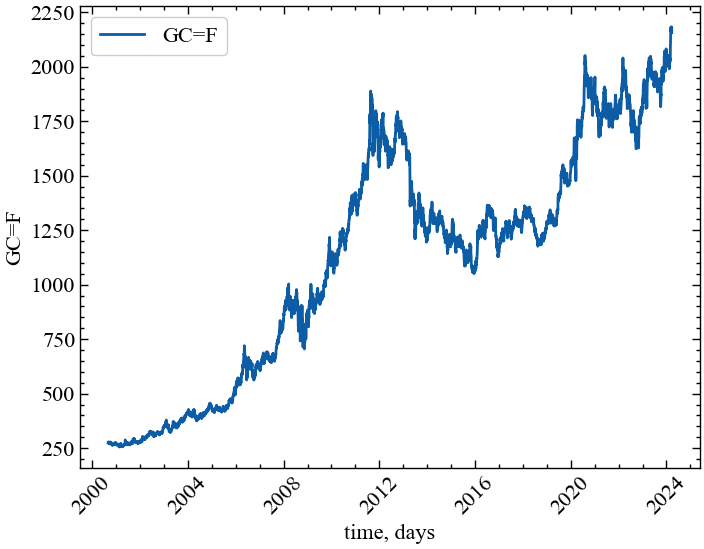

In [5]:
#| label: fig-gold-init 
#| fig-cap: "Динаміка щоденних змін ціни золота"

fig, ax = plt.subplots()                   # Створюємо порожній графік
ax.plot(time_ser.index, time_ser.values)   # Додаємо дані до графіку
ax.legend([symbol])                        # Додаємо легенду
ax.set_xlabel(xlabel)                      # Встановимо підпис по вісі Ох
ax.set_ylabel(ylabel)                      # Встановимо підпис по вісі Oy

plt.xticks(rotation=45)                    # оберт позначок по осі Ох на 45 градусів

plt.savefig(f'{symbol}.jpg')               # Зберігаємо графік 
plt.show();                                # Виводимо графік

Визначимо функцію `transformation()` для стандартизації ряду:

In [6]:
def transformation(signal, ret_type):

    for_rec = signal.copy()

    if ret_type == 1:       # Зважаючи на вид ряду, виконуємо
                            # необхідні перетворення
        pass
    elif ret_type == 2:
        for_rec = for_rec.diff()
    elif ret_type == 3:
        for_rec = for_rec.pct_change()
    elif ret_type == 4:
        for_rec = for_rec.pct_change()
        for_rec -= for_rec.mean()
        for_rec /= for_rec.std()
    elif ret_type == 5: 
        for_rec = for_rec.pct_change()
        for_rec -= for_rec.mean()
        for_rec /= for_rec.std()
        for_rec = for_rec.abs()
    elif ret_type == 6:
        for_rec -= for_rec.mean()
        for_rec /= for_rec.std()

    for_rec = for_rec.dropna().values

    return for_rec

### Обчислення показника Херста із використанням *R/S*-аналізу

Для подальших розрахунків використовуватимемо бібліотеку `neurokit2` та `fathon`. Другу з них можна встановити в наступний спосіб:

In [7]:
#| output: false 

!pip install fathon

   ---------------------------------------- 0.0/428.8 kB ? eta -:--:--
    --------------------------------------- 10.2/428.8 kB ? eta -:--:--
   --- ----------------------------------- 41.0/428.8 kB 495.5 kB/s eta 0:00:01
   ------------- -------------------------- 143.4/428.8 kB 1.2 MB/s eta 0:00:01
   --------------------- ------------------ 225.3/428.8 kB 1.4 MB/s eta 0:00:01
   ----------------------------- ---------- 317.4/428.8 kB 1.5 MB/s eta 0:00:01
   -------------------------------------- - 409.6/428.8 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 428.8/428.8 kB 1.5 MB/s eta 0:00:00


Далі імпортуємо саму бібліотеку та дотичні до неї модулі:

In [8]:
import fathon
from fathon import fathonUtils as fu

Бібліотека `neurokit` містить необхідний метод для *R/S*-аналізу --- `fractal_hurst`. Його синтаксис:

**`fractal_hurst(signal, scale='default', corrected=True, show=False)`**

**Параметри:**

- **signal** (*Union[list, np.array, pd.Series]*) --- сигнал (тобто часовий ряд) у вигляді вектора значень або датафрейму бібліотеки `pandas`;
- **scale** (*list*) --- список, що містить довжини вікон (кількість точок даних у кожній підмножині ряду), на які розбито сигнал;
- **corrected** (*bool*) --- якщо значення `True`, до вихідних даних буде застосовано поправочний коефіцієнт Аніса-Ллойда-Пітерса [@Anis_1976] відповідно до очікуваного значення для окремих значень (*R/S*);
- **show** (*bool*) --- якщо значення `True`, виводить залежність $(R/S)_n$ від $n$ (**scale**) у подвійному логарифмічному масштабі. 

**Повертає:**

- **h** (*float*) --- показник Херста;
- **kwargs** --- словник, що містить інформацію відносно використовуваних у процедурі параметрів.

Розглянемо ступінь трендостійкості в динаміці ціни золота, використовуючи весь часовий ряд. Далі знайдемо значення показника Херста в рамках віконної процедури.

#### Увесь часовий ряд

Першочергово знайдемо значення прибутковостей для нашого ряду та стандартизуємо їх. Після цього виконаємо обчислення. 

In [9]:
signal = time_ser.copy()
ret_type = 4    # вид ряду: 
                # 1 - вихідний, 
                # 2 - детрендований (різниця між теп. значенням та попереднім)
                # 3 - прибутковості звичайні, 
                # 4 - стандартизовані прибутковості, 
                # 5 - абсолютні значення (волатильності)
                # 6 - стандартизований ряд

for_rs = transformation(signal, ret_type) 

Виконуємо *R/S*-аналіз:

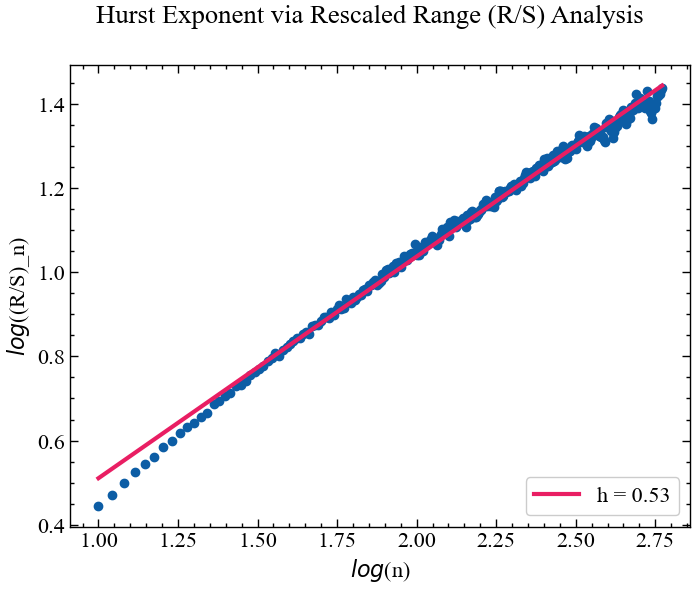

In [10]:
#| label: fig-gold-rs-all 
#| fig-cap: "Залежність значень R/S від скейлінгу"

h, info = nk.fractal_hurst(for_rs, corrected=False, show=True)

Як ми можемо бачити з @fig-gold-rs-all, значення $h=0.53$, що свідчить про подібність цінової динаміки золота до випадкового блукання. Але оскільки закони, що регулюють ринок, змінюються з часом, мають змінюватись і кореляції всередині системи, а тому коефіцієнт Херста також може змінюватись.   

#### Віконна процедура

Визначимо функцію для побудови парних графіків:

In [12]:
def plot_pair(x_values, 
              y1_values,
              y2_values,  
              y1_label, 
              y2_label,
              x_label, 
              file_name, clr="magenta"):

    fig, ax = plt.subplots()

    ax2 = ax.twinx()
    ax2.spines.right.set_position(("axes", 1.03))

    p1, = ax.plot(x_values, 
                  y1_values, 
                  "b-", label=fr"{y1_label}")
    p2, = ax2.plot(x_values,
                   y2_values, 
                   color=clr, 
                   label=y2_label)

    ax.set_xlabel(x_label)
    ax.set_ylabel(f"{y1_label}")
    ax.yaxis.label.set_color(p1.get_color())
    ax2.yaxis.label.set_color(p2.get_color())

    tkw = dict(size=2, width=1.5)

    ax.tick_params(axis='x', **tkw)
    ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
    ax2.tick_params(axis='y', colors=p2.get_color(), **tkw)
    ax2.legend(handles=[p1, p2])

    plt.savefig(file_name + ".jpg")
        
    plt.show();

Приступимо до віконної процедури:

In [13]:
# встановлюємо параметри
ret_type = 4                   # вид ряду
window = 250                   # ширина вікна
tstep = 1                      # часовий крок вікна 
length = len(time_ser.values)  # довжина самого ряду
corr = False                   # поправочний коефіцієнт Аніса-Ллойда-Пітерса

H = []                         # масив для віконного Херсту

In [14]:
for i in tqdm(range(0,length-window,tstep)): # фрагменти довжиною window  
                                             # з кроком tstep

    # відбираємо фрагменти
    fragm = time_ser.iloc[i:i+window].copy()  

    # виконуємо процедуру трансформації ряду 
    fragm = transformation(fragm, ret_type)

    # розраховуємо взаємну інформацію 
    h, _ = nk.fractal_hurst(fragm, corrected=corr, show=False)
    
    # та додаємо результат до масиву значень
    H.append(h)

  7%|▋         | 416/5663 [00:00<00:10, 524.31it/s]

100%|██████████| 5663/5663 [00:10<00:00, 515.78it/s]


In [15]:
np.savetxt(f"rs_hurst_name={symbol}_window={window}_step={tstep}_ \
           rettype={ret_type}_corrected={corr}.txt" , H)

Візуалізуємо результат:

In [16]:
measure_label = r'$H$'
file_name = f"rs_hurst_name={symbol}_window={window}_step={tstep}_ \
           rettype={ret_type}_corrected={corr}"

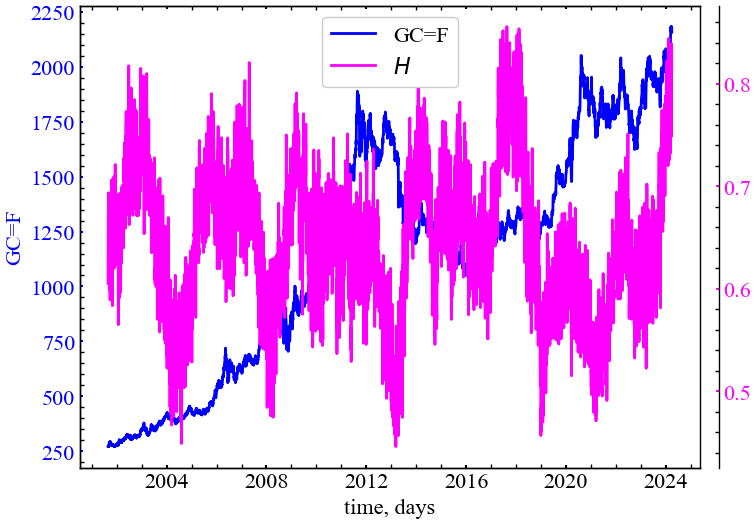

In [17]:
#| label: fig-gold-wind-rs  
#| fig-cap: "Динаміка ціни золота та показника Херста"

plot_pair(time_ser.index[window:length:tstep],
          time_ser.values[window:length:tstep],
          H, 
          ylabel, 
          measure_label,
          xlabel,
          file_name)

На [@fig-gold-wind-rs] можемо бачити, що показник Херста зростає в передкризовий період та спадає під час кризи. Перед кризою динаміка ринку характеризується зростанням трендостійкості (персистентності), що відзеркалює зростання скорельованості дій трейдерів. 

### Обчислення на основі DFA

Бібліотека `fathon` представляє інструментарій як для виконання класичного аналізу детрендованих флуктуацій, так і для його мультифрактального аналогу, мова про який піде в наступній лабораторній роботі. 

#### Для всього ряду

Спочатку представимо значення $\alpha$ для всього ряду. Процедура розрахунків на основі бібліотеки `fathon` виглядатиме наступним чином: 

Знаходимо стандартизовані прибутковості ряду:

In [18]:
signal = time_ser.copy()
ret_type = 4    # вид ряду: 
                # 1 - вихідний, 
                # 2 - детрендований (різниця між теп. значенням та попереднім)
                # 3 - прибутковості звичайні, 
                # 4 - стандартизовані прибутковості, 
                # 5 - абсолютні значення (волатильності)
                # 6 - стандартизований ряд

for_dfa = transformation(signal, ret_type) 

In [19]:
cumulat = fu.toAggregated(for_dfa) # знаходимо кумулятивні накопичення

rev = True # чи повторювати розрахунок ф-ції флуктуацій з кінця
order = 2  # порядок локального лінійного тренду 

pydfa = fathon.DFA(cumulat) # ініціалізація об'єкту DFA
                            # для виконання подальших обчислень

win_beg = 100               # початкова ширина сегментів
win_end = 2000              # кінцева ширина сегментів

wins = fu.linRangeByStep(win_beg, win_end) # генеруємо масив 
                                           # лінійно розділених 
                                           # елементів.

n, F = pydfa.computeFlucVec(wins, 
                            polOrd=order, 
                            revSeg=rev)    # знаходимо функцію флуктуацій

H, H_intercept = pydfa.fitFlucVec()        # знаходимо показник альфа

Виводимо залежність функції флуктуацій від масштабу:

In [20]:
polyfit = np.polyfit(np.log(n), np.log(F), 1)
fluctfit = np.exp(1) ** np.polyval(polyfit, np.log(n))

Будуємо залежність функції флуктуацій від масштабу в подвійному логарифмічному масштабі:

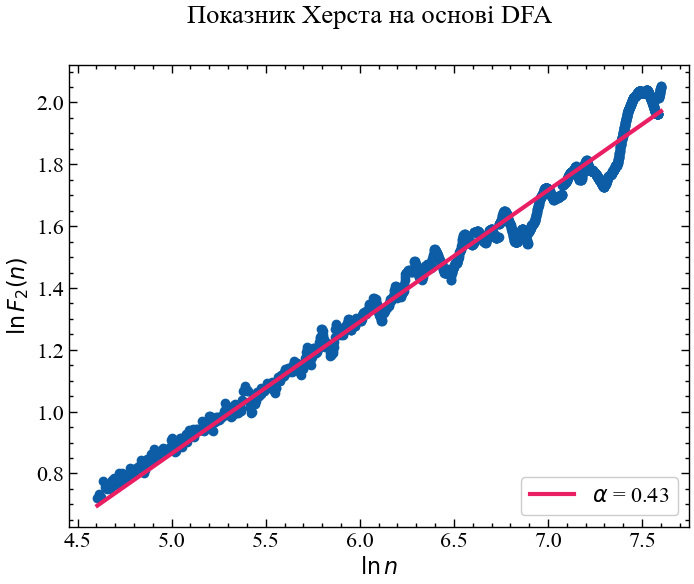

In [21]:
#| label: fig-gold-dfa-all 
#| fig-cap: "Логарифмічна залежність значень 
#| функції флуктуацій від скейлінгу"

fig, ax = plt.subplots()
fig.suptitle("Показник Херста на основі DFA")

ax.scatter(
        np.log(n),
        np.log(F),
        marker="o",
        zorder=1,
        label="_no_legend_",
    )

label = fr"$\alpha$ = {H:.2f}"
ax.plot(np.log(n), np.log(fluctfit), 
        color="#E91E63", zorder=2, 
        linewidth=3, label=label)

ax.set_ylabel(r'$\ln{F_{2}(n)}$')
ax.set_xlabel(r'$\ln{n}$')

ax.legend(loc="lower right")

plt.show()

Процедура DFA показує, що значення ціни золота представляються скоріше антиперсистентними, але представлений результат доволі близький до того, що був отриманий за допомогою *R/S*-аналізу. Розглянемо значення $\alpha$ в рамках алгоритму ковзного вікна. 

#### Віконна процедура

Визначимо наступні параметри:

In [22]:
window = 250    # розмір вікна
tstep = 1       # крок вікна
ret_type = 4    # вид ряду: 
                # 1 - вихідний, 
                # 2 - детрендований (різниця між теп. значенням 
                                                # та попереднім)
                # 3 - прибутковості звичайні, 
                # 4 - стандартизовані прибутковості, 
                # 5 - абсолютні значення (волатильності)
                # 6 - стандартизований ряд

rev = True      # чи повторювати розрахунок ф-ції флуктуацій з кінця
order = 2       # порядок поліноміального тренду

periods = 1

win_beg = 10             # початковий масштаб сегментів
win_end = window-1       # кінцевий масштаб сегментів



length = len(time_ser.values) # довжина ряду

alpha = []               # масив показників альфа (Херста)
D_f = []                 # фрактальна розмірність
beta = []                # показник спектральної щільності
gamma = []               # показник автокореляції

Знайдемо показник Херста ($\alpha$), фрактальну розмірність ($D_f$), показник спектральної щільності ($\beta$) та показник автокореляції ($\gamma$):  

In [23]:
for i in tqdm(range(0,length-window,tstep)):
    
    # відбираємо фрагменти
    fragm = time_ser.iloc[i:i+window].copy()  

    # виконуємо процедуру трансформації ряду 
    fragm = transformation(fragm, ret_type)

    # знаходимо кумулятивні накопичення
    cumulat_wind = fu.toAggregated(fragm) 

    # ініціалізація об'єкту DFA
    pydfa = fathon.DFA(cumulat_wind) 

    # генеруємо масив лінійно розділених елементів
    wins = fu.linRangeByStep(win_beg, win_end) 

    # знаходимо функцію флуктуацій
    n, F_wind = pydfa.computeFlucVec(wins, polOrd=order, revSeg=rev)    

    # знаходимо показник альфа
    H_wind, _ = pydfa.fitFlucVec()

    # знаходимо фрактальну розмірність        
    D = 2. - H_wind

    # показник спектральної щільності
    bi = 2. * H_wind - 1 

    # показник автокореляції
    gi = 2. - 2. * H_wind

    alpha.append(H_wind)
    D_f.append(D)
    beta.append(bi)
    gamma.append(gi)

100%|██████████| 5663/5663 [00:55<00:00, 102.04it/s]


Зберігаємо абсолютні значення показників до текстових файлів:

In [24]:
np.savetxt(f"alpha_{symbol}_{window}_{tstep}_ \
            {ret_type}_{order}_{win_beg}_{win_end}.txt", alpha)
np.savetxt(f"D_f_{symbol}_{window}_{tstep}_ \
            {ret_type}_{order}_{win_beg}_{win_end}.txt", D_f)
np.savetxt(f"beta_{symbol}_{window}_{tstep}_ \
            {ret_type}_{order}_{win_beg}_{win_end}.txt", beta)
np.savetxt(f"gamma_{symbol}_{window}_{tstep}_ \
            {ret_type}_{order}_{win_beg}_{win_end}.txt", gamma)

Оголошуємо мітки для рисунків та назви збережених рисунків:

In [25]:
label_alpha = fr'$\alpha$'
label_d = fr'$D_f$'
label_beta = fr'$\beta$'
label_gamma = fr'$\gamma$'

file_name_alpha = f"alpha_{symbol}_{window}_{tstep}_ \
            {ret_type}_{order}_{win_beg}_{win_end}"
file_name_d = f"D_f_{symbol}_{window}_{tstep}_ \
            {ret_type}_{order}_{win_beg}_{win_end}"
file_name_beta = f"beta_{symbol}_{window}_{tstep}_ \
            {ret_type}_{order}_{win_beg}_{win_end}"
file_name_gamma = f"gamma_{symbol}_{window}_{tstep}_ \
            {ret_type}_{order}_{win_beg}_{win_end}"

Виводимо результати:

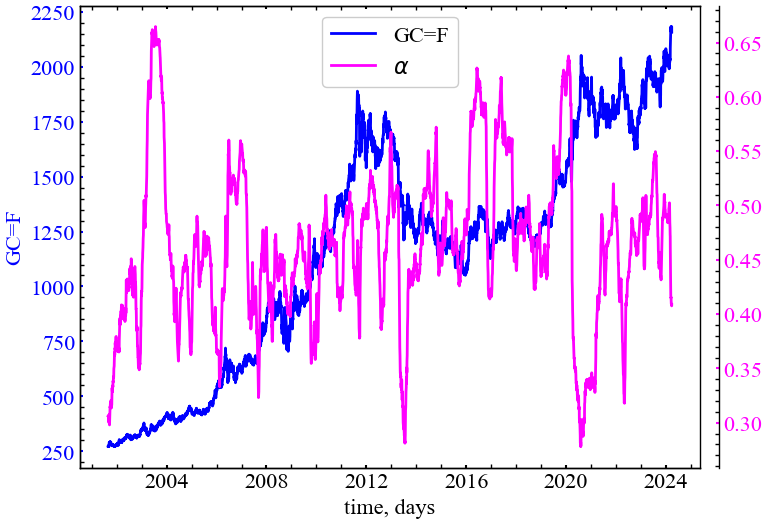

In [26]:
#| label: fig-gold-wind-alpha  
#| fig-cap: "Флуктуації ціни золота та показника альфа"

plot_pair(time_ser.index[window:length:tstep],
          time_ser.values[window:length:tstep],
          alpha, 
          ylabel, 
          label_alpha,
          xlabel,
          file_name_alpha)

Якщо порівнювати з *R/S*-аналізом, @fig-gold-wind-alpha демонструє, що DFA динаміка *узагальненого показника Херста* є набагато стабільнішою. Тепер ми здатні диференціювати значну частку крахових подій, що мали місце на ринку золота. Узагальнений Херст показує, що передкризові явища характеризуються зростанням трендостійкості ринку, підвищенням ступеня самоорганізації системи. 

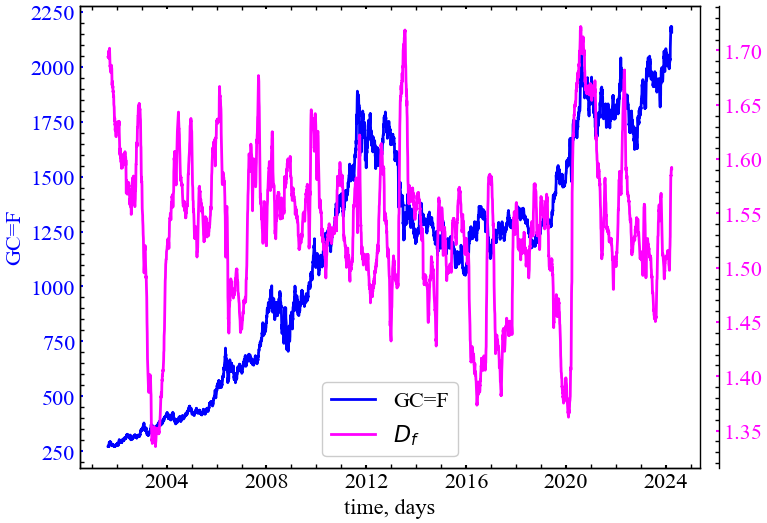

In [27]:
#| label: fig-gold-wind-df  
#| fig-cap: "Коливання ціни золота та фрактальної розмірності"

plot_pair(time_ser.index[window:length:tstep],
          time_ser.values[window:length:tstep],
          D_f, 
          ylabel, 
          label_d,
          xlabel,
          file_name_d)

[@fig-gold-wind-df] показує, що $D_f$ характеризується спадом при кризових станах. Це є індикатором того, що вищий ступень організованості ринку відзеркалюється в більш згладженій або менш волатильних флуктуаціях досліджуваного сигналу.  

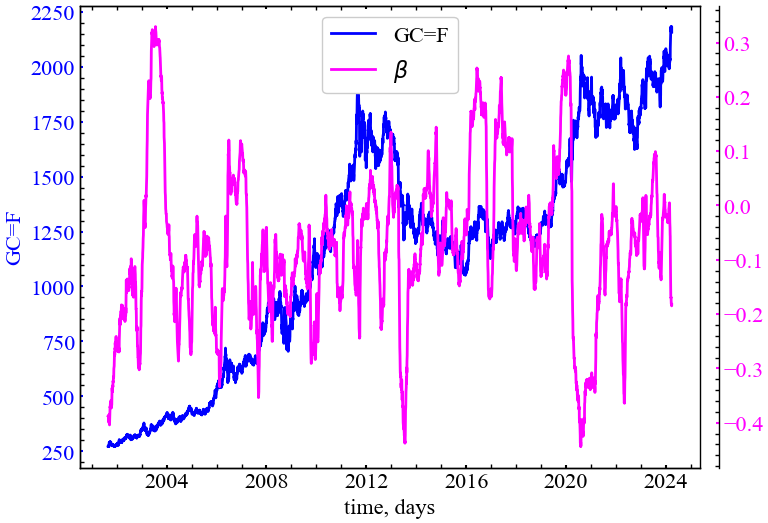

In [28]:
#| label: fig-gold-wind-beta  
#| fig-cap: "Динаміка ціни золота та показника спектральної щільності"

plot_pair(time_ser.index[window:length:tstep],
          time_ser.values[window:length:tstep],
          beta, 
          ylabel, 
          label_beta,
          xlabel,
          file_name_beta)

Спектральна густина потужності $\beta$ [@eq-spec-dens] зростає в кризові періоди, що свідчить про спад потужності сигналу на одиничному інтервалі частоти. Це також є свідченням зростання кореляційних властивостей системи.

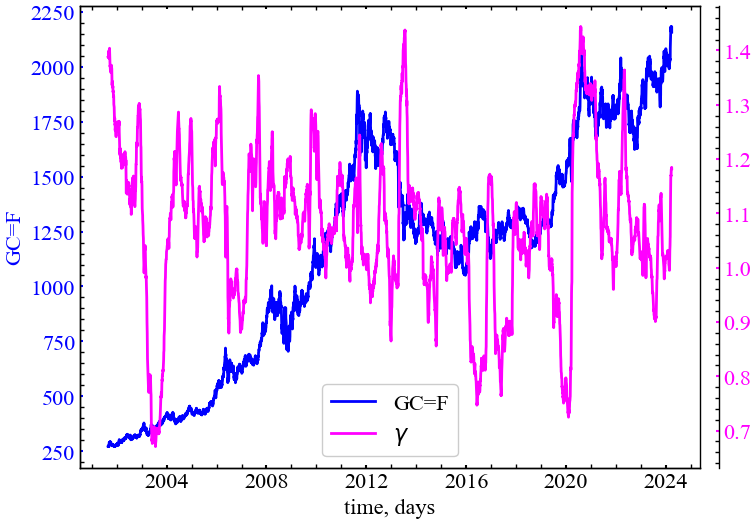

In [29]:
#| label: fig-gold-wind-gamma  
#| fig-cap: "Динаміка індексу золота та показника автокореляції"

plot_pair(time_ser.index[window:length:tstep],
          time_ser.values[window:length:tstep],
          gamma, 
          ylabel, 
          label_gamma,
          xlabel,
          file_name_gamma)

З [@fig-gold-wind-gamma] видно, що показник $\gamma$ спадає в кризові та передкризові періоди. Це є показником сповільнення спаду функції автокореляції, що в свою чергу також вказує на зростання корельованності динаміки системи. 

### Обчислення фрактальної розмірності Хігучі

Як уже зазначалося, фрактальна розмірність Хігучі є одним із різновидів фрактальної розмірності для часових рядів. Вона обчислюється шляхом реконструкції $k_{max}$ кількості нових наборів даних. Для кожного відновленого набору даних обчислюється довжина кривої і відкладається проти відповідного $k_{max}$-значення в логарифмічній шкалі. HFD відповідає нахилу лінійного тренду за методом найменших квадратів.

Розрахуємо оптимальне значення $k$ для всього часового ряду. Бібліотека `neurokit2` представляє готову процедуру для автоматизованого підбору даного параметру. Оптимальний $k_{max}$ розраховується на основі точки, в якій значення фрактальної розмірності досягає плато для діапазону значень $k_{max}$ [@7168285]. 

Синтаксис даної функції виглядає наступним чином:

**`complexity_k(signal, k_max='max', show=False)`**

**Параметри:**

- **signal** (*Union[list, np.array, pd.Series]*) --- сигнал (тобто часовий ряд) у вигляді вектора значень;
- **$k_{max}$** (*Union[int, str, list], optional*) --- максимальна кількість інтервалів (має бути більше або дорівнювати 3), які потрібно перевірити. Якщо  $k_{max}$ = `default`, тоді вибирається максимально можливе значення, що відповідає половині довжини сигналу;
- **show** (*bool*) --- візуалізовується нахил кривої для обраного значення $k_{max}$. 

**Повертає:**

- **k** (*float*) --- оптимальний $k_{max}$ часового ряду;
- **info** (*dict*) --- словник, що містить додаткову інформацію про параметри, які використовуються для обчислення оптимального $k_{max}$.

#### Для всього ряду

Для подальших розрахунків спочатку виконаємо перетворення ряду. Будемо використовувати вихідний часовий ряд для подальших розрахунків: 

In [30]:
signal = time_ser.copy()
ret_type = 1    # вид ряду: 
                # 1 - вихідний, 
                # 2 - детрендований (різниця між теп. значенням та попереднім)
                # 3 - прибутковості звичайні, 
                # 4 - стандартизовані прибутковості, 
                # 5 - абсолютні значення (волатильності)
                # 6 - стандартизований ряд

for_higuchi = transformation(signal, ret_type) 

І тепер отримаємо оптимальне значення $k_{max}$ згідно зазначеної процедури:

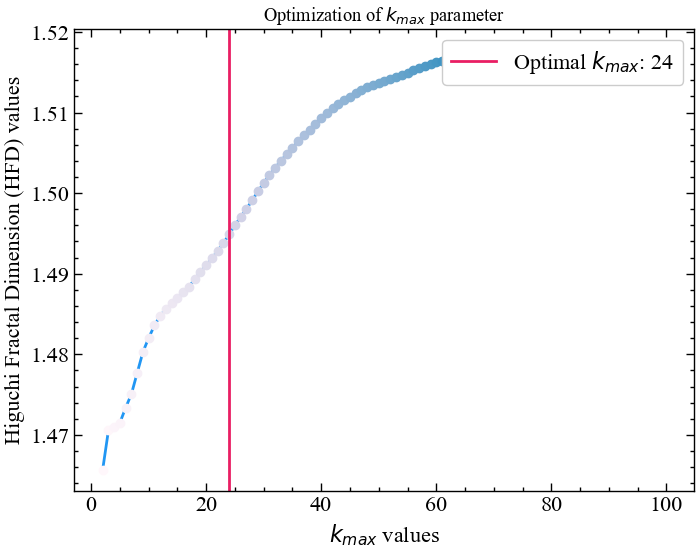

In [31]:
#| label: fig-gold-kmax-all 
#| fig-cap: "Залежність розмірності Хігучі від діапазону значень kmax"

k_max, info = nk.complexity_k(for_higuchi, k_max=100, show=True)

Тепер побудуємо залежність довжини сигналу від часового зміщення в логарифмічному масштабі. Для фрактального сигналу має зберігатися лінійна залежність. Бібліотека `neurokit2` містить метод для розрахунку даної фрактальної розмірності. Синтаксис цієї процедури виглядає наступним чином:

**`fractal_higuchi(signal, k_max='default', show=False, **kwargs)`**

**Параметри:**

- **signal** (*Union[list, np.array, pd.Series]*) --- сигнал (тобто часовий ряд) у вигляді вектора значень;
- **$k_{max}$** (*Union[int, str, list], optional*) --- максимальна кількість інтервалів (має бути більше або дорівнювати 3), які потрібно перевірити;
- **show** (*bool*) --- візуалізовується нахил кривої для обраного значення $k_{max}$. 

**Повертає:**

- **HFD** (*float*) --- фрактальна розмірність Хігучі для досліджуваного часового ряду;
- **info** (*dict*) --- словник, що містить додаткову інформацію про параметри, які використовуються для обчислення фрактальної розмірності Хігучі.

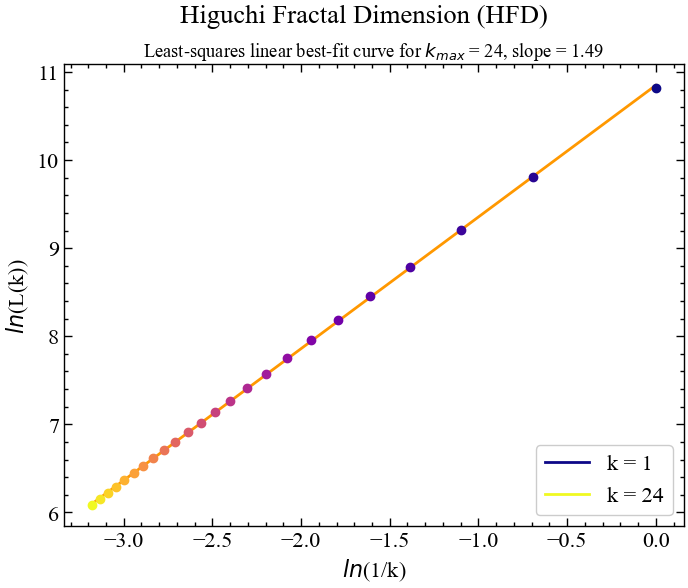

In [32]:
#| label: fig-gold-higuchi-all 
#| fig-cap: "Залежність довжини сигналу від часового зміщення"

hfd, info = nk.fractal_higuchi(for_higuchi, k_max=k_max, show=True)

У подальшому будемо послуговуватись отриманим оптимальним значенням для розрахунку розмірності Хігучі в рамках алгоритму ковзного вікна. 

#### Віконна процедура

Скористаємось наступними параметрами:

In [33]:
window = 250    # розмір вікна
tstep = 1       # крок вікна
ret_type = 1    # вид ряду: 
                # 1 - вихідний, 
                # 2 - детрендований (різниця між теп. значенням 
                                                # та попереднім)
                # 3 - прибутковості звичайні, 
                # 4 - стандартизовані прибутковості, 
                # 5 - абсолютні значення (волатильності)
                # 6 - стандартизований ряд

k_max_wind = 30                    # максимальне часове зміщення

length = len(time_ser.values)      # довжина ряду

hfd_wind = []                      # масив показників Хігучі

Розпочинаємо віконну процедуру:

In [34]:
for i in tqdm(range(0,length-window,tstep)):
    
    # відбираємо фрагменти
    fragm = time_ser.iloc[i:i+window].copy()  

    # виконуємо процедуру трансформації ряду 
    fragm = transformation(fragm, ret_type)

    # розраховуємо фрактальну розмірність Хігучі
    higuchi, _ = nk.fractal_higuchi(fragm, 
                                    k_max=k_max_wind, 
                                    show=False)

    # зберігаємо результат до масиву значень
    hfd_wind.append(higuchi)

100%|██████████| 5663/5663 [00:13<00:00, 414.26it/s]


Зберігаємо вихідні значення до текстового документа:

In [35]:
np.savetxt(f"fd_higuchi_name={symbol}_kmax={k_max_wind}_\
           wind={window}_step={tstep}.txt", hfd_wind)

Оголошуємо мітки для рисунків та назви збережених рисунків:

In [36]:
label_higuchi = fr'$HFD$'

file_name_higuchi = f"fd_higuchi_name={symbol}_kmax={k_max_wind}_\
           wind={window}_step={tstep}"

Виводимо результат:

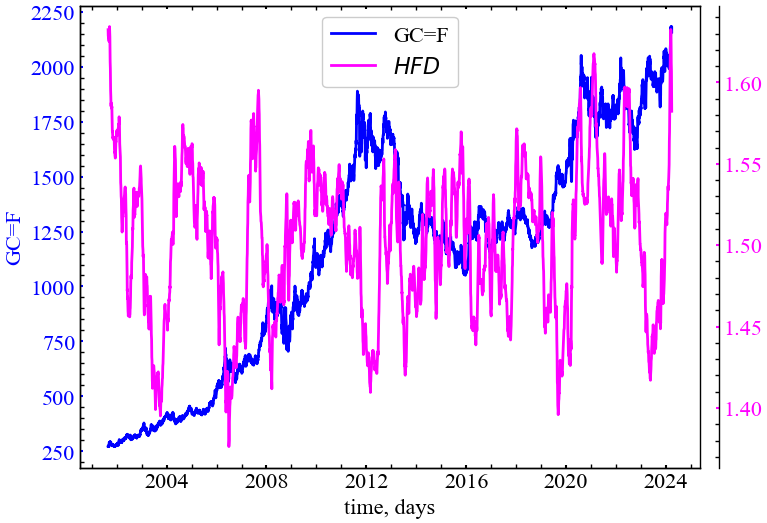

In [37]:
#| label: fig-gold-wind-higuchi  
#| fig-cap: "Динаміка індексу золота та фрактальної розмірності Хігучі"

plot_pair(time_ser.index[window:length:tstep],
          time_ser.values[window:length:tstep],
          hfd_wind, 
          ylabel, 
          label_higuchi,
          xlabel,
          file_name_higuchi)

Як можна бачити з представленого рисунку, фрактальна розмірність Хігучі може працювати як індикатор або індикатор-передвісник кризових явищ. Видно, що даний показник починає спадати у передкризові періоди чи у сам момент кризи, вказуючи на зростання згладженності динаміки системи, ступеня кореляцій та трендостійкості динаміки ринку. 

### Обчислення фрактальної розмірності Петросяна

Петросян [@465426] запропонував швидкий метод оцінки фрактальної розмірності шляхом перетворення сигналу в двійкову послідовність, з якої оцінюється фрактальна розмірність. Існує кілька варіацій алгоритму (`neurokit2`, наприклад, пропонує варіанти `"A"`, `"B"`, `"C"` або `"D"`), що відрізняються насамперед способом створення дискретної (символьної) послідовності (див. `complexity_symbolize()` для деталей). Найпоширеніший метод (`"C"`, за замовчуванням) бінаризує сигнал за знаком послідовних різниць.

Більшість з цих методів дискретизації припускають, що сигнал є періодичним (без лінійного тренду). Для усунення лінійних трендів може бути корисним лінійне детрендування.

Синтаксис даної процедури має наступний вигляд:

**`fractal_petrosian(signal, symbolize='C', show=False)`**

**Параметри:**

- **signal** (*Union[list, np.array, pd.Series]*) --- сигнал (тобто часовий ряд) у вигляді вектора значень;
- **symbolize** (*str*) - метод перетворення неперервного вхідного сигналу в символьний (дискретний) сигнал. За замовчуванням присвоює 0 та 1 значенням нижче та вище середнього. Може мати значення `None`, що припускає дискретність вхідного сигналу;
- **show** (*bool*) --- виводить дискретизацію сигналу. 

**Повертає:**

- **PFD** (*float*) --- фрактальна розмірність Петросяна для досліджуваного часового ряду;
- **info** (*dict*) --- словник, що містить додаткову інформацію про параметри, які використовуються для обчислення фрактальної розмірності Петросяна.

Ми не розглядатимемо детально синтаксис функції `complexity_symbolize()`. Опишемо лише ті методи дискретизації, що дотичні до фрактальної розмірності Петросяна:

- **метод `A`** бінаризує сигнал за більшими та меншими значеннями порівняно із середнім значенням сигналу. Еквівалентом є `method="mean"` (`method="median"` також є допустимим);
- **метод `B`** використовує значення, що знаходяться в діапазоні $\pm 1\sigma$, проти значень, що виходять за межі цього діапазону;
- **метод `C`** обчислює різницю між послідовними вибірками та бінаризує їх залежно від знаку;
- **метод `D`** відокремлює послідовні відліки, що перевищують $1\sigma$ сигналу, від інших менших змін.

Тепер розглянемо віконну динаміку показника. 

#### Віконна процедура

Оскільки більшість з даних методів дискретизації вимагають детрендування ряду, будемо виконувати розрахунки для прибутковостей ціни золота. Скористаємось наступними параметрами:

In [38]:
window = 250    # розмір вікна
tstep = 1       # крок вікна
ret_type = 4    # вид ряду: 
                # 1 - вихідний, 
                # 2 - детрендований (різниця між теп. значенням 
                                                # та попереднім)
                # 3 - прибутковості звичайні, 
                # 4 - стандартизовані прибутковості, 
                # 5 - абсолютні значення (волатильності)
                # 6 - стандартизований ряд

symb = "B"                    # тип дискретизації ряду

length = len(time_ser.values) # довжина ряду

petr_wind = []                 # масив показників Петросяна

Розпочинаємо віконну процедуру:

In [39]:
for i in tqdm(range(0,length-window,tstep)):
    
    # відбираємо фрагменти
    fragm = time_ser.iloc[i:i+window].copy()  

    # виконуємо процедуру трансформації ряду 
    fragm = transformation(fragm, ret_type)

    # розраховуємо фрактальну розмірність Петросяна
    petrocian, _ = nk.fractal_petrosian(fragm, 
                                        symbolize=symb, 
                                        show=False)

    # зберігаємо результат до масиву значень
    petr_wind.append(petrocian)

100%|██████████| 5663/5663 [00:04<00:00, 1240.52it/s]


Зберігаємо вихідні значення до текстового документа:

In [40]:
np.savetxt(f"fd_petrosian_name={symbol}_method={symb}_\
           wind={window}_step={tstep}.txt", petr_wind)

Оголошуємо мітки для рисунків та назви збережених рисунків:

In [41]:
label_petrocian = fr'$PFD$'

file_name_petrocian = f"fd_petrosian_name={symbol}_method={symb}_\
           wind={window}_step={tstep}"

Виводимо результат:

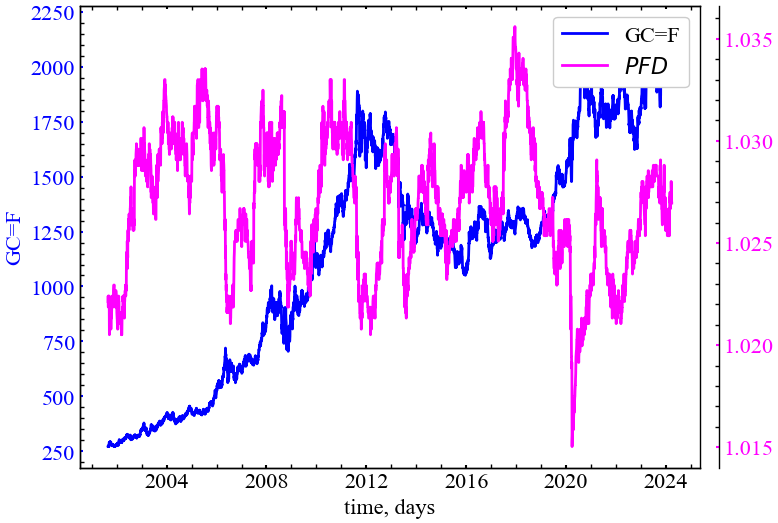

In [42]:
#| label: fig-gold-wind-petro  
#| fig-cap: "Динаміка ціни золота та фрактальної розмірності Петросяна"

plot_pair(time_ser.index[window:length:tstep],
          time_ser.values[window:length:tstep],
          petr_wind, 
          ylabel, 
          label_petrocian,
          xlabel,
          file_name_petrocian)

[@fig-gold-wind-petro] показує, що показник Петросяна також спадає під час кризових подій і вказує на зростання періодизації ринку та синхронізації активності трейдерів у відповідні моменти часу.

### Обчислення фрактальної розмірності Каца

Обчислимо фрактальну розмірність Каца. Евклідові відстані між послідовними точками сигналу підсумовуються і усереднюються, а також визначається максимальна відстань між початковою точкою і будь-якою іншою точкою у вибірці.

Фрактальна розмірність варіюється від 1.0 для прямих ліній, приблизно до 1.15 для випадкових блукань і наближається до 1.5 для найбільш "дивних" форм сигналу.

Синтаксис процедури для розрахунку даної розмірності виглядає наступним чином:

**`fractal_katz(signal)`**

**Параметри:**

- **signal** (*Union[list, np.array, pd.Series]*) --- сигнал (тобто часовий ряд) у вигляді вектора значень.

**Повертає:**

- **KFD** (*float*) --- фрактальна розмірність Каца для досліджуваного часового ряду;
- **info** (*dict*) --- словник, що містить додаткову інформацію (наразі порожній, але повертається для узгодженості з іншими функціями).


#### Віконна процедура

Оскільки даний показник є параметронезалежним, нам достатньо буде лише розміру часового вікна, кроку та типу ряду:

In [43]:
window = 250    # розмір вікна
tstep = 1       # крок вікна
ret_type = 1    # вид ряду: 
                # 1 - вихідний, 
                # 2 - детрендований (різниця між теп. значенням 
                                                # та попереднім)
                # 3 - прибутковості звичайні, 
                # 4 - стандартизовані прибутковості, 
                # 5 - абсолютні значення (волатильності)
                # 6 - стандартизований ряд

length = len(time_ser.values)      # довжина ряду

kz_wind = []                      # масив показників Каца

Розпочинаємо віконну процедуру:

In [44]:
for i in tqdm(range(0,length-window,tstep)):
    
    # відбираємо фрагменти
    fragm = time_ser.iloc[i:i+window].copy()  

    # виконуємо процедуру трансформації ряду 
    fragm = transformation(fragm, ret_type)

    # розраховуємо фрактальну розмірність Хігучі
    katz, _ = nk.fractal_katz(fragm)

    # зберігаємо результат до масиву значень
    kz_wind.append(katz)

 78%|███████▊  | 4423/5663 [00:00<00:00, 5510.57it/s]

100%|██████████| 5663/5663 [00:01<00:00, 5507.52it/s]


Зберігаємо вихідні значення до текстового документа:

In [45]:
np.savetxt(f"fd_katz_name={symbol}_wind={window}_step={tstep}.txt", kz_wind)

Оголошуємо мітки для рисунків та назви збережених рисунків:

In [46]:
label_katz = fr'$KFD$'

file_name_katz = f"fd_katz_name={symbol}_wind={window}_step={tstep}"

Виводимо результат:

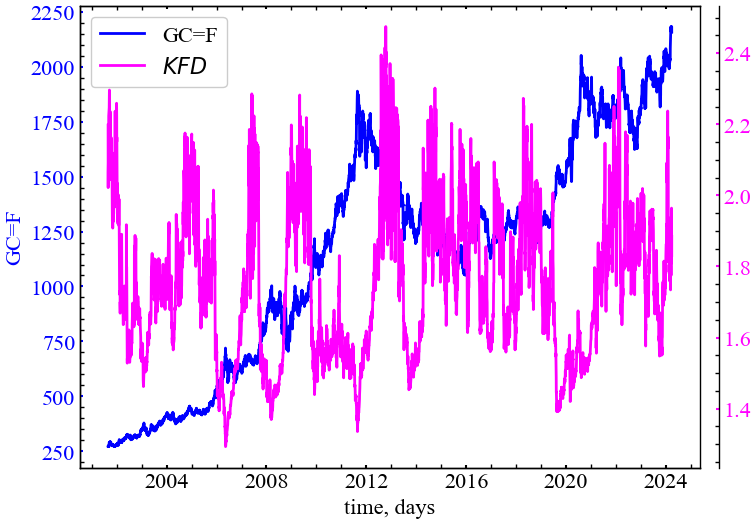

In [47]:
#| label: fig-gold-wind-katz  
#| fig-cap: "Динаміка ціни золота та фрактальної розмірності Каца"

plot_pair(time_ser.index[window:length:tstep],
          time_ser.values[window:length:tstep],
          kz_wind, 
          ylabel, 
          label_katz,
          xlabel,
          file_name_katz)

З рисунку видно, що фрактальна розмірність Каца також спадає у кризові та передкризові періоди і також є індикатором зростання ступеня корельованості системи в дані періоди.

### Обчислення фрактальної розмірності Шевчика

Алгоритм цієї фрактальної розмірності був запропонований для обчислення фрактальної розмірності сигналів Шевчиком [@sevcik2010procedure]. Цей метод можна використовувати для швидкого вимірювання складності сигналу.

Синтаксис методу:

**`fractal_sevcik(signal)`**

**Параметри**

- **signal** (*Union[list, np.array, pd.Series]*) --- сигнал (тобто часовий ряд) у вигляді вектора значень.

**Повертає**

- **SFD** (*float*) --- фрактальна розмірність Севчика для досліджуваного часового ряду;
- **info** (*dict*) --- словник, що містить додаткову інформацію (наразі порожній, але повертається для узгодженості з іншими функціями).


#### Віконна процедура

In [48]:
window = 250    # розмір вікна
tstep = 1       # крок вікна
ret_type = 1    # вид ряду: 
                # 1 - вихідний, 
                # 2 - детрендований (різниця між теп. значенням 
                                                # та попереднім)
                # 3 - прибутковості звичайні, 
                # 4 - стандартизовані прибутковості, 
                # 5 - абсолютні значення (волатильності)
                # 6 - стандартизований ряд

length = len(time_ser.values)      # довжина ряду

sfd_wind = []                      # масив показників Севчика

Розпочинаємо віконну процедуру:

In [49]:
for i in tqdm(range(0,length-window,tstep)):
    
    # відбираємо фрагменти
    fragm = time_ser.iloc[i:i+window].copy()  

    # виконуємо процедуру трансформації ряду 
    fragm = transformation(fragm, ret_type)

    # розраховуємо фрактальну розмірність Севчика
    sevcik, _ = nk.fractal_sevcik(fragm)

    # зберігаємо результат до масиву значень
    sfd_wind.append(sevcik)

 56%|█████▌    | 3182/5663 [00:00<00:00, 4571.63it/s]

100%|██████████| 5663/5663 [00:01<00:00, 4536.64it/s]


Зберігаємо вихідні значення до текстового документа:

In [50]:
np.savetxt(f"fd_cevcik_name={symbol}_wind={window}_step={tstep}.txt", sfd_wind)

Оголошуємо мітки для рисунків та назви збережених рисунків:

In [51]:
label_sevcik = fr'$SFD$'

file_name_sevcik = f"fd_cevcik_name={symbol}_wind={window}_step={tstep}"

Виводимо результат:

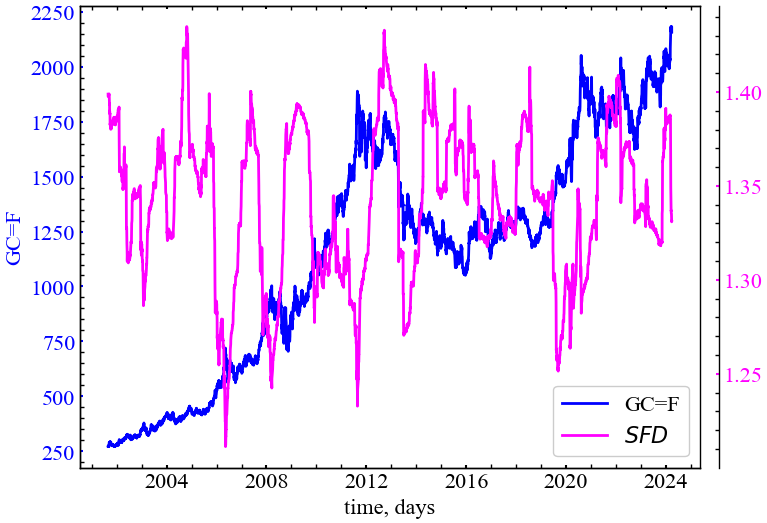

In [52]:
#| label: fig-gold-wind-sevcik  
#| fig-cap: "Динаміка ціни золота та фрактальної розмірності Шевчика"

plot_pair(time_ser.index[window:length:tstep],
          time_ser.values[window:length:tstep],
          sfd_wind, 
          ylabel, 
          label_sevcik,
          xlabel,
          file_name_sevcik)

Бачимо, що фрактальна розмірність Шевчика реагує спадом на крахові події на ринку золота. Особливо характерними є спади під час криз 2008, 2011, 2015 та 2020 років. Цінові флуктуації золота під час зазначених кризових подій також характеризувалися зростанням персистентності (кореляцій).

### Обчислення фрактальної розмірності через нормалізовану щільність довжини

Це доволі простий показник, що відповідає середнім абсолютним послідовним різницям (стандартизованого) сигналу (`np.mean(np.abs(np.diff(std_signal)))`). Метод було розроблено для вимірювання складності сигналів дуже короткої тривалості (< 30 відліків), і його можна використовувати, наприклад, коли цікавлять неперервні зміни фрактальної розмірності сигналу при обчисленні в межах ковзних вікон.

Синтаксис процедури:

**`fractal_nld(signal, corrected=False)`**

**Параметри:**

- **signal** (*Union[list, np.array, pd.Series]*) --- сигнал (тобто часовий ряд) у вигляді вектора значень;
- **corrected** (*bool*) --- якщо значення `True`, змінює масштаб вихідного значення фрактальної розмірності відповідно до степеневої моделі, щоб зробити його більш порівнянним з "істинним" значенням: `FD = 1.9079*((NLD-0.097178)^0.18383)`. Зауважте, що це може призвести до `np.nan`, якщо результат різниці буде від'ємним.

**Повертає:**

- **NLDFD** (*float*) --- фрактальна розмірність;
- **info** (*dict*) --- словник із додатковою інформацією по розрахункам.


#### Віконна процедура

Для цього показника нам також не потребується нічого зайвого:

In [53]:
window = 250    # розмір вікна
tstep = 1       # крок вікна
ret_type = 4    # вид ряду: 
                # 1 - вихідний, 
                # 2 - детрендований (різниця між теп. значенням 
                                                # та попереднім)
                # 3 - прибутковості звичайні, 
                # 4 - стандартизовані прибутковості, 
                # 5 - абсолютні значення (волатильності)
                # 6 - стандартизований ряд

nld_corrected = True               # нормалізація фрактальної розмірності

length = len(time_ser.values)      # довжина ряду

nldfd_wind = []                    # масив показників 

Розпочинаємо віконну процедуру:

In [54]:
for i in tqdm(range(0,length-window,tstep)):
    
    # відбираємо фрагменти
    fragm = time_ser.iloc[i:i+window].copy()  

    # виконуємо процедуру трансформації ряду 
    fragm = transformation(fragm, ret_type)

    # розраховуємо фрактальну розмірність 
    nld, _ = nk.fractal_nld(fragm, 
                            corrected=nld_corrected)

    # зберігаємо результат до масиву значень
    nldfd_wind.append(nld)

100%|██████████| 5663/5663 [00:04<00:00, 1286.46it/s]


Зберігаємо вихідні значення до текстового документа:

In [55]:
np.savetxt(f"fd_nld_name={symbol}_wind={window}_\
           step={tstep}_corrected={nld_corrected}.txt", nldfd_wind)

Оголошуємо мітки для рисунків та назви збережених рисунків:

In [56]:
label_nld = fr'$NLDFD$'

file_name_nld = f"fd_nld_name={symbol}_wind={window}_\
                step={tstep}_corrected={nld_corrected}"

Виводимо результат:

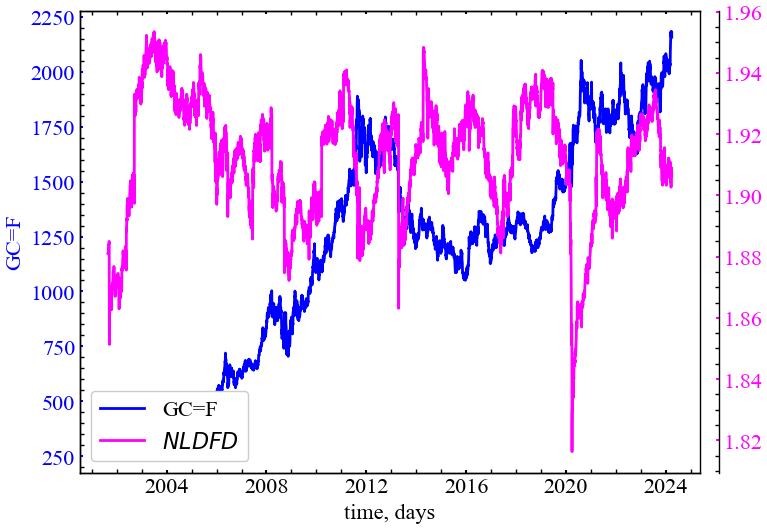

In [57]:
#| label: fig-gold-wind-nld  
#| fig-cap: "Динаміка ціни золота та 
#| фрактальної розмірності через нормалізовану щільність довжини"

plot_pair(time_ser.index[window:length:tstep],
          time_ser.values[window:length:tstep],
          nldfd_wind, 
          ylabel, 
          label_nld,
          xlabel,
          file_name_nld)

@fig-gold-wind-nld показує, що $NLDFD$ спадає під час кризових та передкризових подій, що свідчить про зростання кореляцій у дані періоди. 

### Обчислення фрактальної розмірності через нахил спектральної щільності потужності

Скористаємось наступним методом бібліотеки `neurokit2`:

**`fractal_psdslope(signal, method='voss1988', show=False, **kwargs)`**

**Параметри:**

- **signal** (*Union[list, np.array, pd.Series]*) --- сигнал (тобто часовий ряд) у вигляді вектора значень;
- **method** (*str*) --- метод оцінки фрактальної розмірності за нахилом, може бути `"voss1988"` (за замовчуванням) або `"hasselman2013"`;
- **show** (*bool*) --- якщо значення `True`, повертає графік залежності спектральної щільності потужності від частоти в логарифмічному масштабі;
- **kwargs** --- інші аргументи, які слід передати до `signal_psd()`.

**Повертає:**

- **slope** (*float*) --- оцінка фрактальної розмірності, отримана в результаті аналізу нахилу спектральної щільності потужності;
- **info** (*dict*) --- словник, що містить додаткову інформацію про параметри, які використовуються для аналізу нахилу спектральної щільності потужності.

#### Для всього ряду

Для подальших розрахунків спочатку виконаємо перетворення ряду. Будемо використовувати вихідний часовий ряд для подальших розрахунків: 

In [58]:
signal = time_ser.copy()
ret_type = 1    # вид ряду: 
                # 1 - вихідний, 
                # 2 - детрендований (різниця між теп. значенням та попереднім)
                # 3 - прибутковості звичайні, 
                # 4 - стандартизовані прибутковості, 
                # 5 - абсолютні значення (волатильності)
                # 6 - стандартизований ряд

for_psd = transformation(signal, ret_type) 

І тепер виведемо графік залежності спектральної щільності потужності від частоти в логарифмічному масштабі:

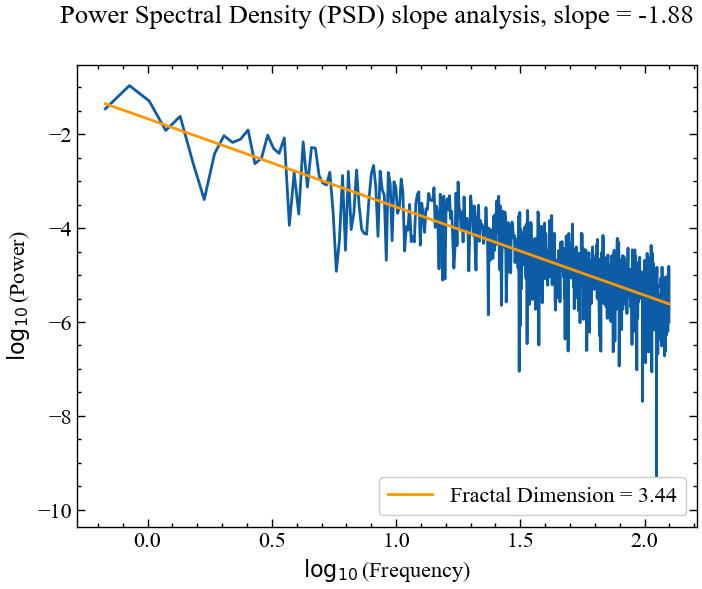

In [59]:
#| label: fig-gold-psd-all 
#| fig-cap: "Залежність спектральної щільності потужності
#| від частоти в логарифмічному масштабі"

psdslope, info = nk.fractal_psdslope(for_psd,
                                     method="voss1988",
                                     show=True)

Очевидно, нахил спектральної щільності потужності на різних частотах має лінійну залежність, а кут нахилу прямої побудованої за спектром, близький до -2, що вказує на те, що динаміка індексу золота близька до дробового броунівського руху.

Тепер розглянемо варіацію кута нахилу спектра в рамках алгоритму ковзного вікна.

#### Віконна процедура

Встановимо наступні параметри:

In [60]:
window = 250    # розмір вікна
tstep = 1       # крок вікна
ret_type = 4    # вид ряду: 
                # 1 - вихідний, 
                # 2 - детрендований (різниця між теп. значенням 
                                                # та попереднім)
                # 3 - прибутковості звичайні, 
                # 4 - стандартизовані прибутковості, 
                # 5 - абсолютні значення (волатильності)
                # 6 - стандартизований ряд

method_psd = "voss1988"        # метод для розрахунку
                               # спектральної щільності

length = len(time_ser.values)  # довжина ряду

psd_wind = []                  # масив показників 

Розпочинаємо віконну процедуру:

In [61]:
for i in tqdm(range(0,length-window,tstep)):
    
    # відбираємо фрагменти
    fragm = time_ser.iloc[i:i+window].copy()  

    # виконуємо процедуру трансформації ряду 
    fragm = transformation(fragm, ret_type)

    # розраховуємо фрактальну розмірність 
    psd, _ = nk.fractal_psdslope(fragm, method=method_psd)

    # зберігаємо результат до масиву значень
    psd_wind.append(psd)

  6%|▌         | 334/5663 [00:00<00:13, 405.54it/s]

100%|██████████| 5663/5663 [00:13<00:00, 416.58it/s]


Зберігаємо вихідні значення до текстового документа:

In [62]:
np.savetxt(f"fd_psd_name={symbol}_method{method_psd}_\
           wind={window}_step={tstep}.txt", psd_wind)

Оголошуємо мітки для рисунків та назви збережених рисунків:

In [63]:
label_psd = fr'$PSDFD$'

file_name_psd = f"fd_psd_name={symbol}_method{method_psd}_\
                wind={window}_step={tstep}"

Виводимо результат:

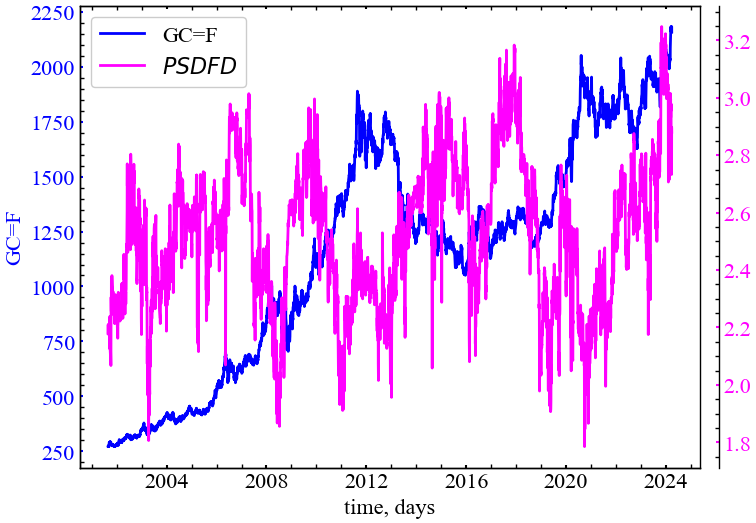

In [64]:
#| label: fig-gold-wind-psd  
#| fig-cap: "Флуктуації ціни золота та 
#| фрактальної розмірності за нахилом спектральної щільності потужності"

plot_pair(time_ser.index[window:length:tstep],
          time_ser.values[window:length:tstep],
          psd_wind, 
          ylabel, 
          label_psd,
          xlabel,
          file_name_psd)

Рисунок вище показує, що даний показник також реагує спадом на кризові та передкризові події, вказуючи на зростання автокореляції часового ряду. Також зрозуміло, що має місце варіації нахилу спектра щільності потужності. В одні моменти часу динаміка сигналу може бути подібна до броунівського руху, а в інші до білого шуму.

### Обчислення кореляційної розмірності

Кореляційна розмірність (також позначається як $D_2$) є нижньою границею оцінки фрактальної розмірності досліджуваного фазового простору.

Спочатку здійснюється реконструкція фазового простору сигналу згідно методу часової затримки, і далі обчислюються відстані між усіма точками траєкторії. Потім обчислюється "кореляційна сума", яка є часткою пар точок, відстань між якими менша за заданий радіус. Остаточна кореляційна розмірність апроксимується графіком залежності кореляційної суми від радіусу багатовимірного околу досліджуваних траєкторій у логарифмічному масштабі.

Цю розмірність можна викликати через `fractal_correlation()`. Її синтаксис виглядає наступним чином:

**`fractal_correlation(signal, delay=1, dimension=2, radius=64, show=False, **kwargs)`**

**Параметри:**

- **signal** (*Union[list, np.array, pd.Series]*) --- сигнал (тобто часовий ряд) у вигляді вектора значень;
- **delay** (*int*) --- часова затримка ($\tau$);
- **dimension** (*int*) --- розмірність вкладень ($m$);
- **radius** (*Union[str, int, list]*) --- послідовність радіусів для перевірки. Якщо передано ціле число, буде отримано експоненціальну послідовність довжиною заданим скалярним значенням `radius` у межах від 2.5% до 50% від діапазону відстані. Методи, реалізовані в інших пакетах, можна використовувати, вказуючи `"nolds"`, `"Corr_Dim"` або `"boon2008"`;
- **show** (*bool*) --- графік кореляційної розмірності, якщо `True`. За замовчуванням --- `False`;
- **kwargs** --- інші аргументи для передачі (наразі не використовуються).

**Повертає:**

- **cd** (*float*) --- кореляційна розмірність часового ряду;
- **info** (*dict*) --- словник, що містить додаткову інформацію про параметри, які використовуються для обчислення кореляційної розмірності.

#### Для всього часового ряду

Розглянемо залежність кореляційної суми від радіусу для всього часового ряду. Перш за все виконаємо перетворення ряду:

In [65]:
signal = time_ser.copy()
ret_type = 1    # вид ряду: 
                # 1 - вихідний, 
                # 2 - детрендований (різниця між теп. значенням та попереднім)
                # 3 - прибутковості звичайні, 
                # 4 - стандартизовані прибутковості, 
                # 5 - абсолютні значення (волатильності)
                # 6 - стандартизований ряд

for_corr = transformation(signal, ret_type) 

Тепер розрахуємо кореляційну розмірність, побудувавши залежність кореляційної суми від радіусу в логарифмічному масштабі:

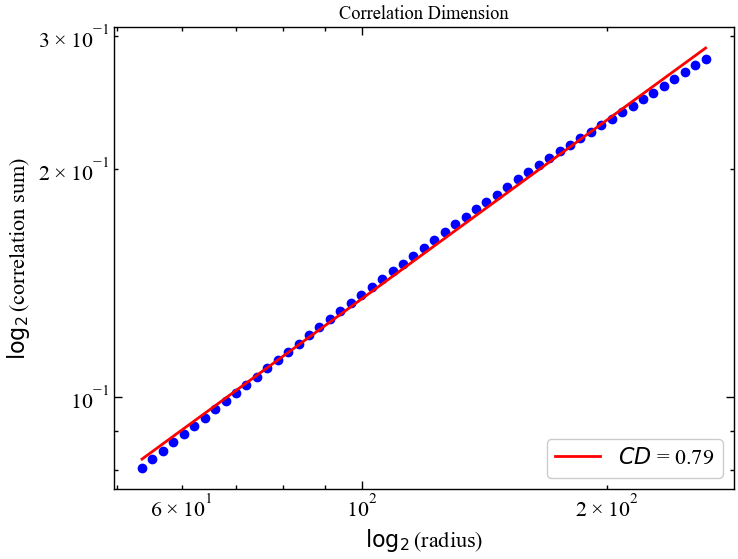

In [66]:
#| label: fig-gold-corr-all 
#| fig-cap: "Залежність кореляційної суми від радіусу
#| багатовимірного околу досліджуваних траєкторій"

cd, info = nk.fractal_correlation(for_corr,
                                  delay=1, 
                                  dimension=1,
                                  radius="nolds", 
                                  show=True)

Як ми можемо бачити, кореляційна сума дійсно має лінійну залежність для різних значень радіусу околу певної траєкторії, що вказує на фрактальність системи. Тепер подивимось як варіюється значення кореляційної розмірності в періоди турбулентності.

#### Віконна процедура

Для цього показника визначимо наступні параметри:

In [67]:
window = 250    # розмір вікна
tstep = 1       # крок вікна
ret_type = 1    # вид ряду: 
                # 1 - вихідний, 
                # 2 - детрендований (різниця між теп. значенням 
                                                # та попереднім)
                # 3 - прибутковості звичайні, 
                # 4 - стандартизовані прибутковості, 
                # 5 - абсолютні значення (волатильності)
                # 6 - стандартизований ряд

d_wind = 2          # розмірність вкладень
tau_wind = 1        # часова затримка
rad_wind = "nolds"  # метод для визначення масиву радіусів

length = len(time_ser.values)      # довжина ряду

corr_wind = []                     # масив показників 

Розпочинаємо віконну процедуру:

In [68]:
for i in tqdm(range(0,length-window,tstep)):
    
    # відбираємо фрагменти
    fragm = time_ser.iloc[i:i+window].copy()  

    # виконуємо процедуру трансформації ряду 
    fragm = transformation(fragm, ret_type)

    # розраховуємо фрактальну розмірність 
    cd_wind, _ = nk.fractal_correlation(fragm,
                                        delay=tau_wind, 
                                        dimension=d_wind,
                                        radius=rad_wind)

    # зберігаємо результат до масиву значень
    corr_wind.append(cd_wind)

100%|██████████| 5663/5663 [00:18<00:00, 308.32it/s]


Зберігаємо вихідні значення до текстового документа:

In [69]:
np.savetxt(f"fd_correlation_name={symbol}_wind={window}_\
                step={tstep}_dim={d_wind}_tau={tau_wind}_\
                radius={rad_wind}.txt", corr_wind)

Оголошуємо мітки для рисунків та назви збережених рисунків:

In [70]:
label_cd = fr'$CD$'

file_name_cd = f"fd_correlation_name={symbol}_wind={window}_\
                step={tstep}_dim={d_wind}_tau={tau_wind}_\
                radius={rad_wind}"

Виводимо результат:

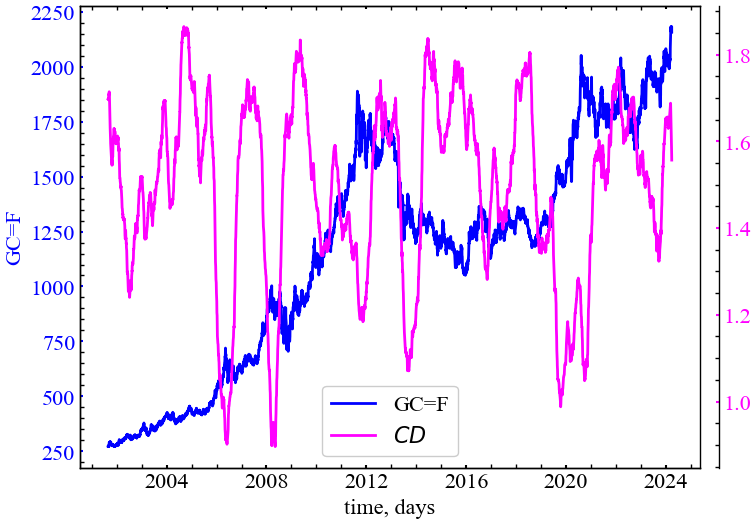

In [71]:
#| label: fig-gold-wind-cd  
#| fig-cap: "Динаміка ціни золота та 
#| кореляційної фрактальної розмірності"

plot_pair(time_ser.index[window:length:tstep],
          time_ser.values[window:length:tstep],
          corr_wind, 
          ylabel, 
          label_cd,
          xlabel,
          file_name_cd)

[@fig-gold-wind-cd] демонструє, що кореляційна розмірність для індексу золота також спадає у кризові та передкризові періоди, вказуючи на зростання корельованості теперішніх цін на золото з попередніми. Можна сказати й по іншому: у період криз трейдери починають самоорганізовуватись та колективно скупати або продавати відповідний актив; іншими словами, їх динаміка стає більш синхронною. Оскільки кореляційна розмірність вимірюється для траєкторій фазового простору, спад цього показника свідчить про зростання щільності досліджуваних траєкторій. Тобто, фазовий простір стає більш розрідженим, а всі його траєкторії концентрованими лише в одній конкретній області, що є індикатором згуртованості прихованих змінних досліджуваної системи.

## Завдання для виконання

1. Вибрати із запропонованої бази даних варіант завдання 
2. Виконати дослідження фрактальних характеристик заданих часових рядів. Зберегти результати в окремому файлі
3. Порівняти значення коефіцієнтів Херста, одержаних методом R/S-аналізу та DFA
4. Провести повний аналіз різних методів розрахунку монофрактальних розмірностей
5. Дати інтерпретацію отриманим результатам